## **PREDICTION OF SEPSIS USING MACHINE LEARNING**

**Data Fields**

| Column Name	| Attribute/Target	| Description |
|---------------|-------------------|-------------|
| ID	| N/A	| Unique number to represent patient ID |
| PRG	| Attribute 1	| Plasma glucose | 
| PL	| Attribute 2	| Blood Work Result-1 (mu U/ml) |
| PR	| Attribute 3	| Blood Pressure (mm Hg) |
| SK	| Attribute 4	| Blood Work Result-2 (mm) |
| TS	| Attribute 5	| Blood Work Result-3 (mu U/ml) |
| M11	| Attribute 6	| Body mass index (weight in kg/(height in m)^2) |
| BD2	| Attribute 7	| Blood Work Result-4 (mu U/ml) |
| Age	| Attribute 8	| patients age (years) |
| Insurance |	N/A	| If a patient holds a valid insurance card |
| Sepssis	| Target	| Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise |

**Business Objective**

The objective of this project is to predict whether a patient in ICU will develop sepsis or not based on the 8 attributes to allow for early detection.

**Analytical Questions**
1. What is the relationship between Plasma level and sepsis prevalence?
2. How is the BMI influencing Sepsis?
3. Are insured patients less or more likely to have sepsis.
4. Does Age contribute to the likelihood of having sepsis?
5. How do different blood work tests relate with sepsis
6. Which level of blood pressure is most likely to develop sepsis?

**Hypothesis**

`H0:` There is no relationship between the plasma and sepsis

`H1:` There is a relationship between the plasma and sepsis

### Importation

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [92]:
data = pd.read_csv('../data/Paitients_Files_Train.csv').drop(columns='ID')
data.sample(5) 

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
120,0,162,76,56,100,53.2,0.759,25,1,Positive
399,3,193,70,31,0,34.9,0.241,25,1,Positive
12,10,139,80,0,0,27.1,1.441,57,1,Negative
322,0,124,70,20,0,27.4,0.254,36,1,Positive
178,5,143,78,0,0,45.0,0.190,47,1,Negative


### Data Cleaning

In [93]:
data['sepsis'] = data['Sepssis']
data = data.drop(columns='Sepssis')
data

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,sepsis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0,Negative
595,0,188,82,14,185,32.0,0.682,22,1,Positive
596,0,67,76,0,0,45.3,0.194,46,1,Negative
597,1,89,24,19,25,27.8,0.559,21,0,Negative


In [94]:
#convert column headers to lowercase
data.columns = data.columns.str.lower()
data

,prg,pl,pr,sk,ts,m11,bd2,age,insurance,sepsis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0,Negative
595,0,188,82,14,185,32.0,0.682,22,1,Positive
596,0,67,76,0,0,45.3,0.194,46,1,Negative
597,1,89,24,19,25,27.8,0.559,21,0,Negative


In [95]:
#map insurance to negative and positive
data['insurance'] = data['insurance'].map({0:'Negative',1:'Positive'})
data

,prg,pl,pr,sk,ts,m11,bd2,age,insurance,sepsis
0,6,148,72,35,0,33.6,0.627,50,Negative,Positive
1,1,85,66,29,0,26.6,0.351,31,Negative,Negative
2,8,183,64,0,0,23.3,0.672,32,Positive,Positive
3,1,89,66,23,94,28.1,0.167,21,Positive,Negative
4,0,137,40,35,168,43.1,2.288,33,Positive,Positive
...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,Negative,Negative
595,0,188,82,14,185,32.0,0.682,22,Positive,Positive
596,0,67,76,0,0,45.3,0.194,46,Positive,Negative
597,1,89,24,19,25,27.8,0.559,21,Negative,Negative


### Exploratoratory Data Analysis

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   prg        599 non-null    int64  
 1   pl         599 non-null    int64  
 2   pr         599 non-null    int64  
 3   sk         599 non-null    int64  
 4   ts         599 non-null    int64  
 5   m11        599 non-null    float64
 6   bd2        599 non-null    float64
 7   age        599 non-null    int64  
 8   insurance  599 non-null    object 
 9   sepsis     599 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 46.9+ KB


* The data is complete with no missing data
* insurance is an integer but it should be categorical

In [97]:
#change insurance datatype
data['insurance'] = data['insurance'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   prg        599 non-null    int64  
 1   pl         599 non-null    int64  
 2   pr         599 non-null    int64  
 3   sk         599 non-null    int64  
 4   ts         599 non-null    int64  
 5   m11        599 non-null    float64
 6   bd2        599 non-null    float64
 7   age        599 non-null    int64  
 8   insurance  599 non-null    object 
 9   sepsis     599 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 46.9+ KB


In [98]:
print(f'There are {data.duplicated().sum()} duplicates')

There are 0 duplicates


In [99]:
#data describe
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
prg,599.0,NaN,NaN,NaN,3.824708,3.362839,0.0,1.0,3.0,6.0,17.0
pl,599.0,NaN,NaN,NaN,120.153589,32.682364,0.0,99.0,116.0,140.0,198.0
pr,599.0,NaN,NaN,NaN,68.732888,19.335675,0.0,64.0,70.0,80.0,122.0
sk,599.0,NaN,NaN,NaN,20.562604,16.017622,0.0,0.0,23.0,32.0,99.0
ts,599.0,NaN,NaN,NaN,79.460768,116.576176,0.0,0.0,36.0,123.5,846.0
m11,599.0,NaN,NaN,NaN,31.920033,8.008227,0.0,27.1,32.0,36.55,67.1
bd2,599.0,NaN,NaN,NaN,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
age,599.0,NaN,NaN,NaN,33.290484,11.828446,21.0,24.0,29.0,40.0,81.0
insurance,599,2,Positive,411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sepsis,599,2,Negative,391,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* The data columns are not on similar scale. We will need to standardize to get the best results.

### **Univariate Analysis**

In [100]:
#Creating a list of numerical and categorical columns
numericals = []
categoricals = []
for col in data.columns:
    if data[col].dtype != 'object':
        numericals.append(col)
    else:
        categoricals.append(col)

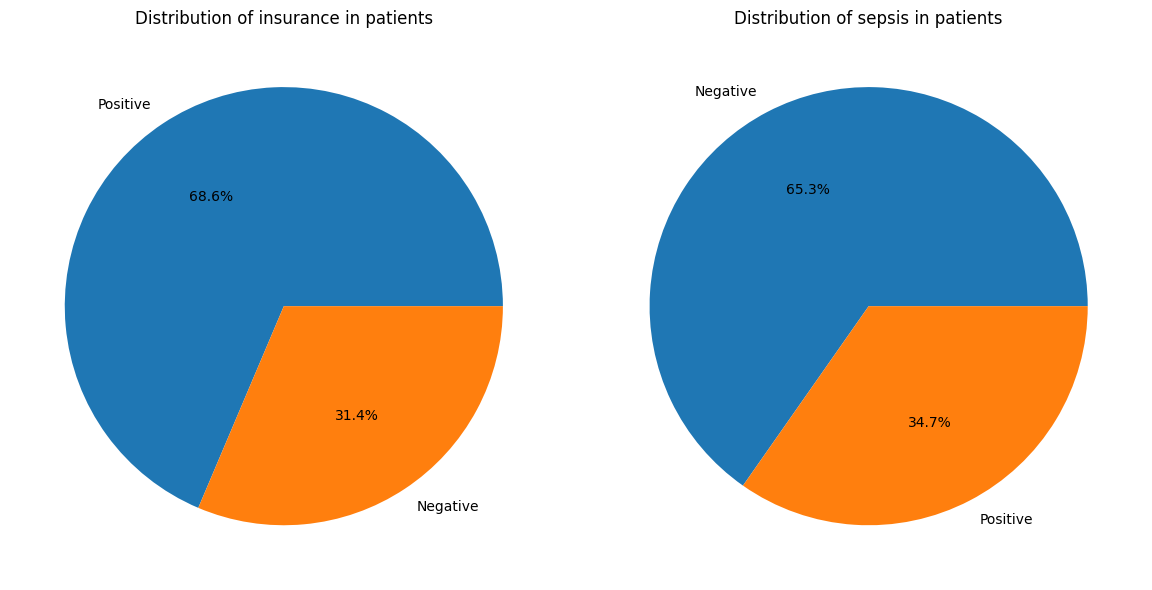

In [101]:
#checking distribution of categorical patients
fig, axs = plt.subplots(nrows=1, ncols=len(categoricals), figsize=(12,6))

for i, item in enumerate(categoricals):
    labels = data[item].value_counts().index
    axs[i].pie(data[item].value_counts(), autopct="%2.1f%%", labels = labels)
    axs[i].set_title(f'Distribution of {item} in patients')
    plt.tight_layout()

plt.show()

* There is an imbalance in the patient with sepsis and without. But it seems like there could be an inverse relationship between insurance and sepsis.

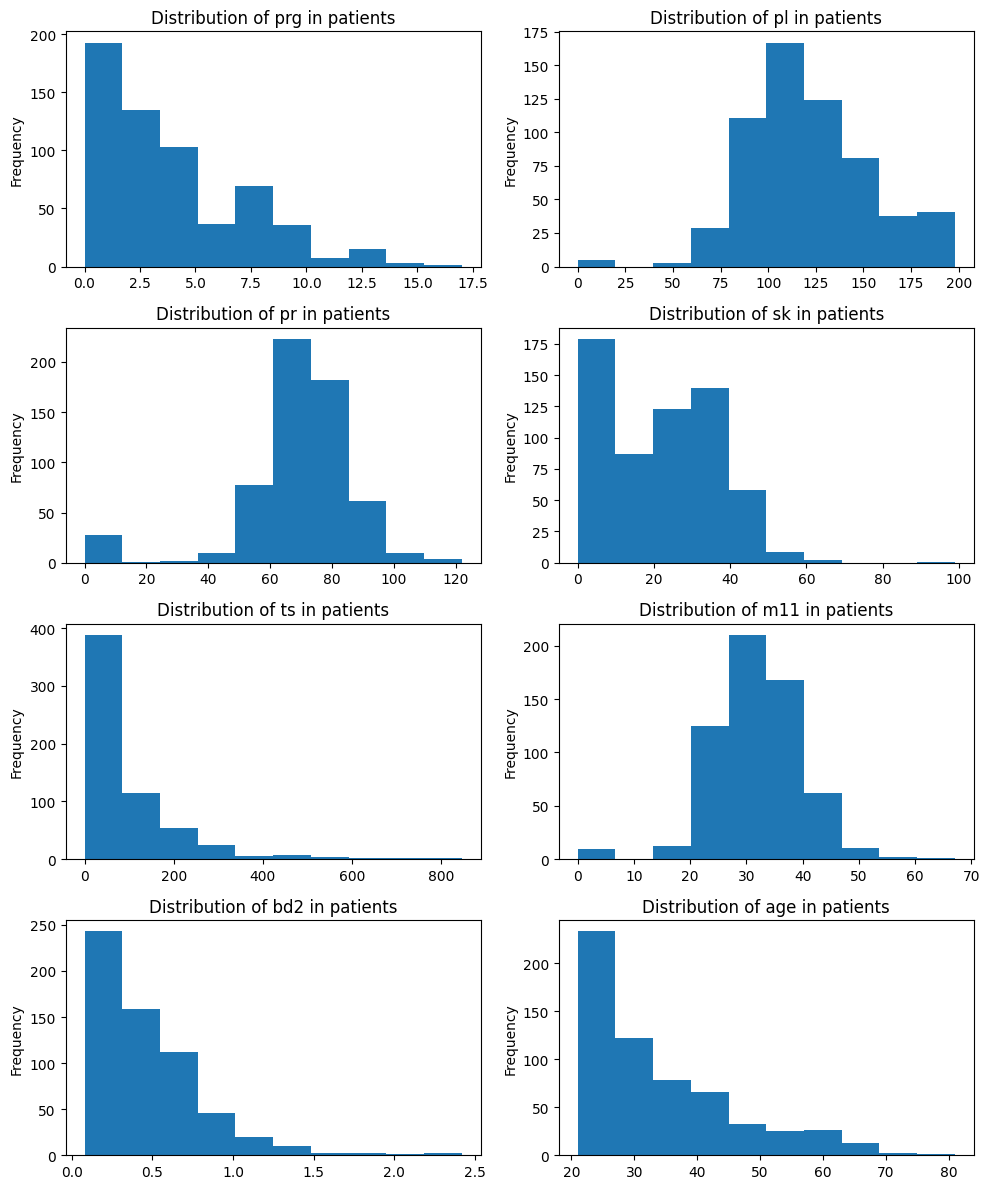

In [123]:
#checking distribution for all the numerical columns
fig, axs = plt.subplots(nrows=round(len(numericals)/2), ncols=2, figsize=(10,12))

for i, item in enumerate(numericals):
    row = i // 2
    col = i % 2
    data[item].plot(kind='hist', ax=axs[row, col])
    axs[row, col].set_title(f'Distribution of {item} in patients')
    plt.tight_layout()

plt.show()

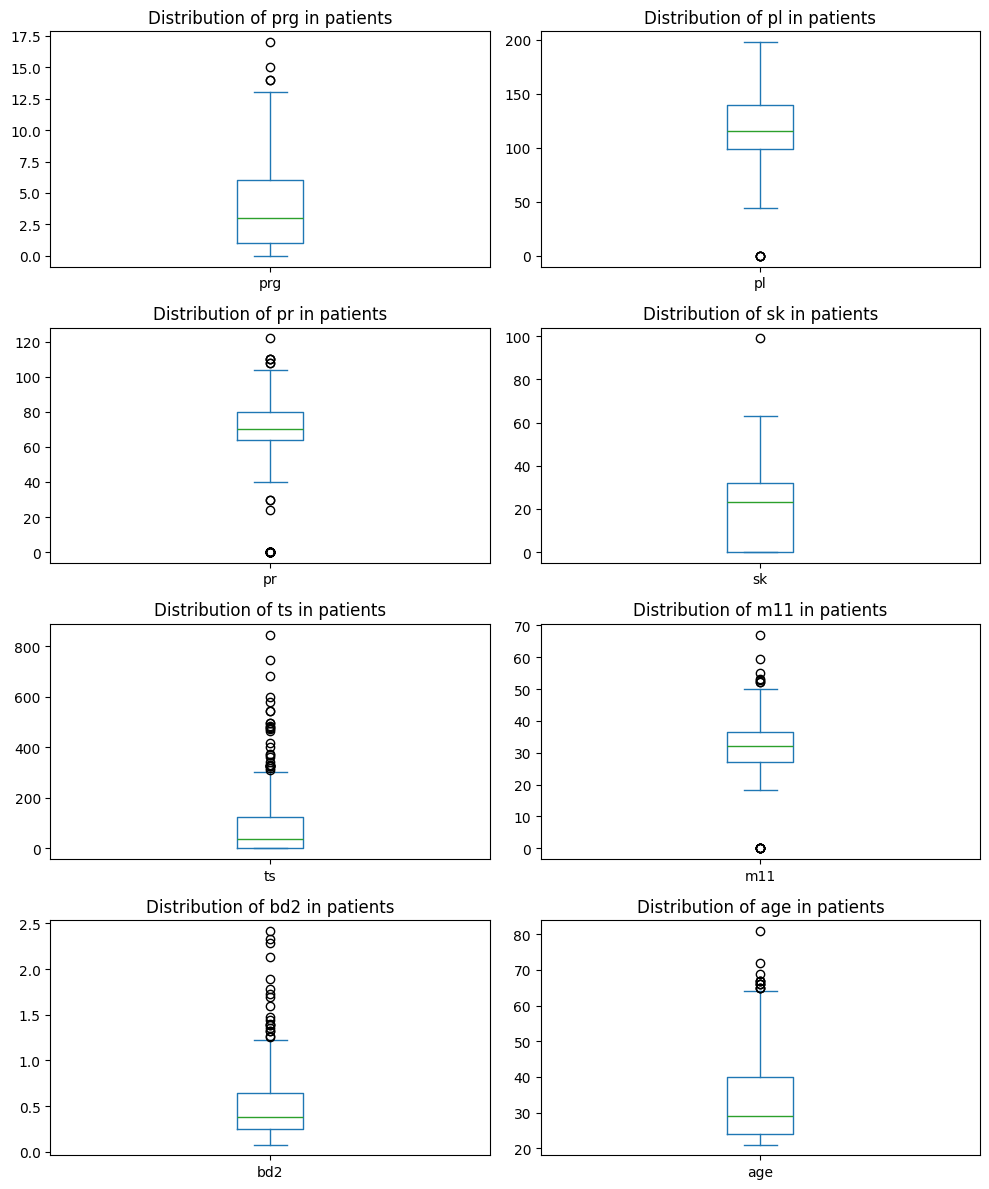

In [124]:
#checking outliers for all the numerical columns
fig, axs = plt.subplots(nrows=round(len(numericals)/2), ncols=2, figsize=(10,12))

for i, item in enumerate(numericals):
    row = i // 2
    col = i % 2
    data[item].plot(kind='box', ax=axs[row, col])
    axs[row, col].set_title(f'Distribution of {item} in patients')
    plt.tight_layout()

plt.show()

* The features are not really well distributed and they have a number of outliers. 
* We need to standardize and deal with the outliers

### **Bivariate Analysis**

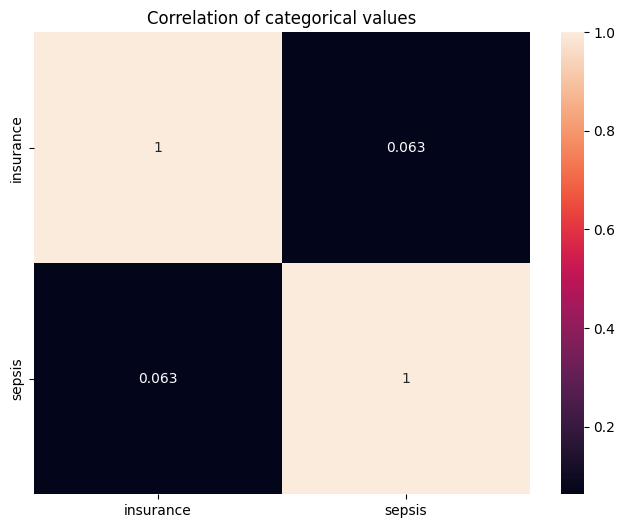

In [128]:
#correlation of categorical features
data_encoded = pd.DataFrame(columns=['insurance','sepsis'])
data_encoded['insurance'] = data['insurance'].map({'Positive':1,'Negative':0})
data_encoded['sepsis'] = data['sepsis'].map({'Positive':1,'Negative':0})

#plot correlation
plt.figure(figsize=(8,6))
sns.heatmap(data_encoded.corr('pearson', min_periods=1), annot=True)
plt.title('Correlation of categorical values')
plt.show()

* There is little to no significant correlation between insurance and sepsis.

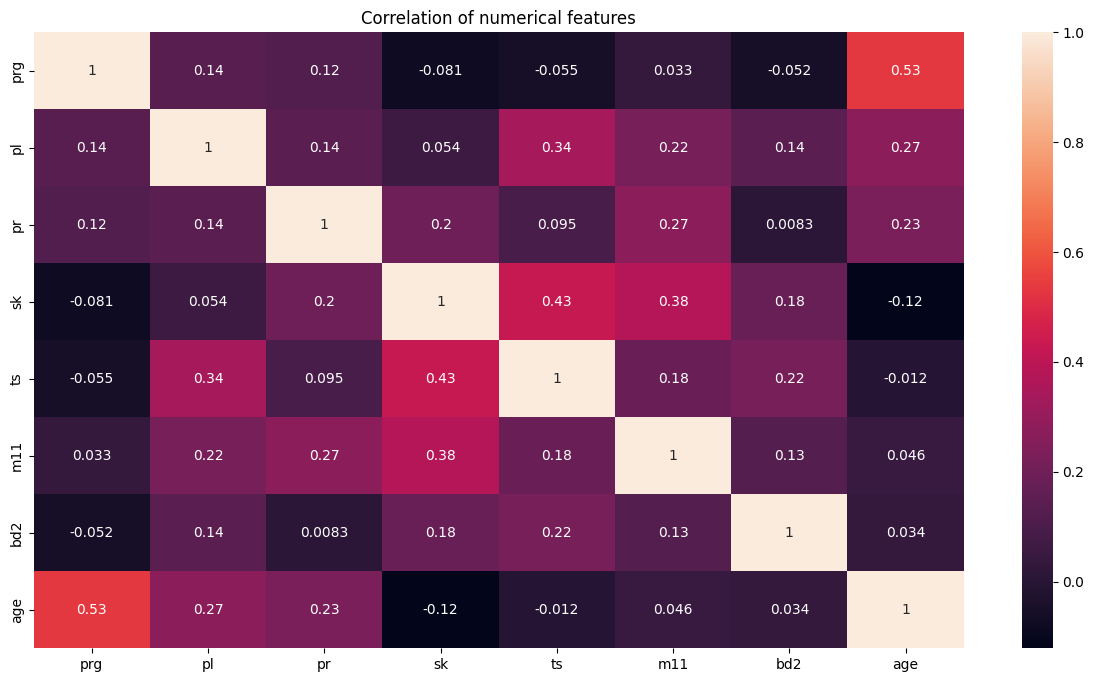

In [110]:
#correlation of numerical features
plt.figure(figsize=(15,8))
sns.heatmap(data[numericals].corr(), annot=True)
plt.title('Correlation of numerical features')
plt.show()

* There is correlation between age and prg (plasma level), ts and sk and between
* 